# Basic packages and setup

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import constants

# Read a file and save its data to a Python data structure (list)

In [27]:
train_data, y_train, test_data, ids_test = constants.get_train_test_data()

train_data[0]

,Electromyogram 1,Electromyogram 2,Electromyogram 3,Electromyogram 4,Accelerometer Upper 1,Accelerometer Upper 2,Accelerometer Upper 3,Goniometer 1,Accelerometer Lower 1,Accelerometer Lower 2,Accelerometer Lower 3,Goniometer 2
0,29217,33306,36574,41732,33144,37189,34088,34552,33536,37170,34520,30953
1,32096,33699,33083,34492,33144,37189,34088,34552,33536,37170,34520,30953
2,35288,32517,27353,24188,33144,37189,34088,34552,33536,37170,34520,30953
3,35181,32965,28085,25079,33144,37189,34088,34552,33536,37170,34520,30953
4,34420,32567,29388,27433,33144,37189,34088,34552,33536,37170,34520,30953
...,...,...,...,...,...,...,...,...,...,...,...,...
2493,32742,33067,32795,35254,31868,37710,33876,34208,33636,36812,35464,30010
2494,32793,32911,32541,34542,31868,37710,33876,34208,33636,36812,35464,30010
2495,32928,32615,32419,33495,31868,37710,33876,34208,33636,36812,35464,30010
2496,32996,32614,32647,32593,31868,37710,33876,34208,33636,36812,35464,30010


In [28]:
len(train_data), len(y_train), len(test_data), len(ids_test)

(95, 95, 100, 100)

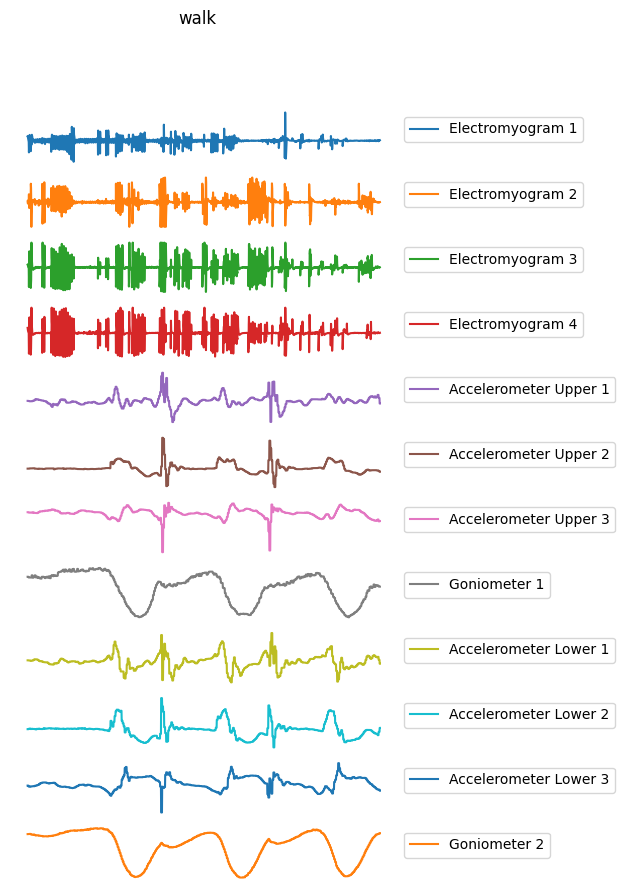

In [29]:
df, label = train_data[-2], y_train[-2]

# Set up the subplots: 12 rows, 1 column
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(5, 10), sharex=True)

# Plot each time series in a separate subplot
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column, color="C" + str(i))
    # axes[i].text(0, np.max(df[column]), column)
    axes[i].legend([column], bbox_to_anchor=(1,1))
    axes[i].axis("off")
_ = plt.suptitle(label)

# Plot one channel's raw values

Text(0.5, 1.0, 'walk')

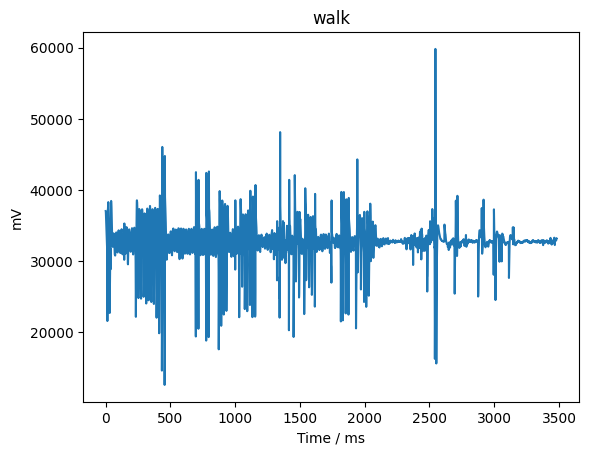

In [30]:
sensor_name = "Electromyogram 1"

plt.plot(df[sensor_name])
plt.xlabel("Time / ms")
plt.ylabel(constants.units[sensor_name.split(" ")[0]])
plt.title(label)

# Test simple Gaussian NB classifier

In [31]:
def feature_combi(data, featurecombi):
    f_mean = [i.mean() for i in data]
    f_std = [i.std() for i in data]
    f_max = [i.max() for i in data]
    f_min = [i.min() for i in data]
    if featurecombi == "mean":
        return f_mean 
    if featurecombi == "std":
        return f_std
    if featurecombi == "max":
        return f_max
    if featurecombi == "min":
        return f_min
    if featurecombi == "mean_std":
        return f_mean + f_std
    if featurecombi == "max_min":
        return f_max + f_min
    return f_mean + f_std + f_max + f_min

In [32]:
# import tsfel

# cfg = tsfel.get_features_by_domain("statistical")

# X_train = []
# for data in train_data:
#     X_train += [tsfel.time_series_features_extractor(cfg, data, fs=1000)]
# X_train = pd.concat(X_train)

# X_test = []
# for data in test_data:
#     X_test += [tsfel.time_series_features_extractor(cfg, data, fs=1000)]
# X_test = pd.concat(X_test)

In [33]:
from sklearn.naive_bayes import GaussianNB

features = "std"
clf = GaussianNB()

X_train = []
for sample in train_data:
    X_train.append(feature_combi(np.array(sample).T, features))
clf.fit(X_train, y_train)

X_test = []
for sample in test_data:
    X_test.append(feature_combi(np.array(sample).T, features))
y_pred = clf.predict(X_test)

groundtruth = np.loadtxt(os.path.join(constants.dataset_folder, "Groundtruth.txt"), dtype=str)

print("Accuracy: ", np.sum(y_pred == groundtruth), "%")


Accuracy:  80 %


In [34]:
count = 0
for i in range(len(y_pred)):
    if y_pred[i] == groundtruth[i]:
        print ("Correct. Prediction:", y_pred[i], "| Groundtruth:", groundtruth[i])
        count += 1
    else:
        print ("Wrong.   Prediction:", y_pred[i], "| Groundtruth: ", groundtruth[i])

print ("Feature:", features, " | Accuracy:", count, "%")

Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: stand | Groundtruth: stand
Correct. Prediction: sit | Groundtruth: sit
Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: walk | Groundtruth: walk
Wrong.   Prediction: walk | Groundtruth:  curve-right
Correct. Prediction: sit-to-stand | Groundtruth: sit-to-stand
Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: sit | Groundtruth: sit
Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: sit-to-stand | Groundtruth: sit-to-stand
Correct. Prediction: walk | Groundtruth: walk
Correct. Prediction: stand | Groundtruth: stand
Wrong.   Prediction: walk | Groundtruth:  stand-to-sit
Wrong.   Prediction: stand-to-sit | Groundtruth:  sit
Correct. Prediction: stand | Groundtruth: stand
Correct. Prediction: curve-left | Groundtruth: curve-left
Correct. Prediction: stand | Groundtruth: stand
Correct. Prediction: walk | Groundtruth: walk
Correct

In [35]:
ALLOWED_EXTENSIONS = {'.csv', '.txt'}

def evaluateSubmission(submissionFile):
	groundtruth = ["walk", "stand", "sit", "walk", "walk", "curve-right", "sit-to-stand", "walk", "walk", "sit", "walk", "sit-to-stand", "walk", "stand", "stand-to-sit", "sit", "stand", "curve-left", "stand", "walk", "walk", "sit-to-stand", "walk", "sit", "walk", "sit-to-stand", "sit", "sit", "curve-right", "stand", "sit", "walk", "curve-right", "stand", "curve-left", "sit", "curve-right", "curve-right", "walk", "walk", "sit-to-stand", "stand-to-sit", "sit-to-stand", "stand-to-sit", "curve-right", "walk", "sit-to-stand", "walk", "walk", "stand", "curve-right", "walk", "curve-left", "stand-to-sit", "sit", "curve-left", "sit", "curve-right", "walk", "walk", "walk", "walk", "curve-left", "stand", "walk", "walk", "sit-to-stand", "stand-to-sit", "stand", "walk", "walk", "stand-to-sit", "walk", "curve-left", "stand-to-sit", "stand", "stand-to-sit", "walk", "walk", "walk", "stand-to-sit", "sit", "walk", "stand-to-sit", "walk", "sit-to-stand", "walk", "walk", "curve-left", "stand", "stand-to-sit", "sit", "walk", "sit-to-stand", "curve-left", "sit", "sit-to-stand", "walk", "sit-to-stand", "curve-left"]
	try:
		with open(submissionFile) as f:
			lines = f.readlines()
	except Exception as e:
		return float('nan'), f"Fehler in der hochgeladenen Datei: {str(e)}", True
		
	results = ["".join(x for x in i.replace("\n", "").lower() if x.isalpha() or x == "-") for i in lines]
	count = 0
	for i in range(len(results)):
		if groundtruth[i] == results[i]:
			count +=1
	final_score = (100.00 - count) / 100.00
	return final_score, f"Upload erfolgreich. Endnote (Fehlerquote): {final_score:.2f}.", True

evaluateSubmission("test.csv")

(nan,
 "Fehler in der hochgeladenen Datei: [Errno 2] No such file or directory: 'test.csv'",
 True)